# AtliQ Sales by category in Chile
Hello, friends 👋🏽.
Building on our previous notebooks, in which we connected SQL and Python using sqlalchemy to extract relevant data from the RDBMS, we will now delve into insights about Chile. It's noteworthy that **Chile has experienced the most significant exponential growth in total gross sales of AtliQ Hardware among Latin American countries!**

The database comes from the "SQL Begginer to Advanced" course, provided by [CodeBasics](https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ). It is about the entire db of AtliQ Hardware!!

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the df created before
Chile_Products_byCustomer = pd.read_csv('../../data/interim/Chile_Products_byCustomer.csv')
Chile_Products_byCustomer.head()

,customer,platform,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Amazon,E-Commerce,2021-12-01,70,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Standard,"13,862.86"
1,Electricalsbea Stores,Brick & Mortar,2021-11-01,63,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Premium,"13,515.75"
2,Electricalsbea Stores,Brick & Mortar,2021-11-01,70,P & A,Peripherals,Processors,AQ Electron 4 3600 Desktop Processor,Premium,"13,187.36"
3,Amazon,E-Commerce,2021-11-01,65,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Standard,"12,872.65"
4,Amazon,E-Commerce,2021-11-01,58,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Premium,"12,443.07"


In [4]:
Chile_Products_byCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           8755 non-null   object 
 1   platform           8755 non-null   object 
 2   date               8755 non-null   object 
 3   sold_quantity      8755 non-null   int64  
 4   division           8755 non-null   object 
 5   segment            8755 non-null   object 
 6   category           8755 non-null   object 
 7   product            8755 non-null   object 
 8   variant            8755 non-null   object 
 9   total_gross_sales  8755 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 684.1+ KB


After a quick EDA, I want to visualize the total_gross_sales by category:

In [5]:

category_sales_by_customer = Chile_Products_byCustomer.groupby(['category', 'customer']).agg(
    total_gross_sales=('total_gross_sales', 'sum')
).reset_index().sort_values('total_gross_sales', ascending=False)
category_sales_by_customer

,category,customer,total_gross_sales
3,Business Laptop,Electricalsbea Stores,"419,423.73"
2,Business Laptop,Amazon,"416,165.47"
6,Gaming Laptop,Amazon,"380,711.97"
23,Processors,Electricalsbea Stores,"359,313.73"
22,Processors,Amazon,"353,924.26"
20,Personal Laptop,Amazon,"340,836.75"
7,Gaming Laptop,Electricalsbea Stores,"306,512.91"
21,Personal Laptop,Electricalsbea Stores,"302,980.35"
12,Keyboard,Amazon,"260,446.93"
13,Keyboard,Electricalsbea Stores,"226,648.99"


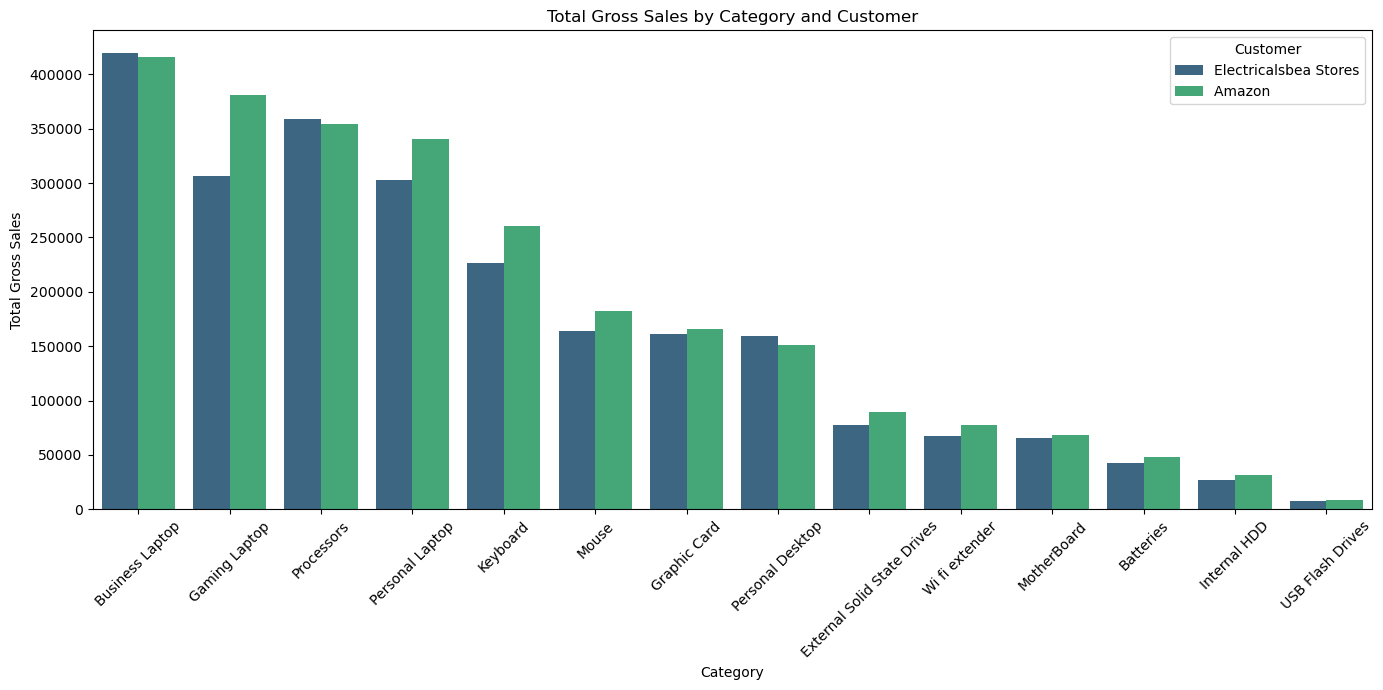

In [6]:


# Plotting the data
plt.figure(figsize=(14, 7))
sns.barplot(data=category_sales_by_customer, x='category', y='total_gross_sales', hue='customer', palette='viridis')
plt.title('Total Gross Sales by Category and Customer')
plt.ylabel('Total Gross Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Customer')
plt.tight_layout()
plt.show()

We can observe that categories tend to have a similar number of sales per customer, that is, by platform, and the competition is indeed fierce. While Amazon leads in sales for some categories, Electricalsbea Stores excels in others, and is, in fact, the top seller for business laptops. I'm curious to see which store will come out on top in total sales.

In [7]:
category_sales_by_customer.groupby('customer')['total_gross_sales'].sum()

customer
Amazon                  2,574,977.94
Electricalsbea Stores   2,387,611.96
Name: total_gross_sales, dtype: float64

Wow, the amount of money this store handles is astounding. Consider that the combined sum of these two amounts to nearly 5 million dollars! And that's just for their period in Chile, which spans from:

In [8]:
chile = pd.read_csv('../../data/interim/chile.csv')
chile.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-09-01,1,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,16.23
1,Amazon,E-Commerce,Retailer,Chile,2019-10-01,2,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,32.46
2,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
3,Amazon,E-Commerce,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
4,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-12-01,3,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,48.70


In [9]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           8755 non-null   object 
 1   platform           8755 non-null   object 
 2   channel            8755 non-null   object 
 3   market             8755 non-null   object 
 4   date               8755 non-null   object 
 5   sold_quantity      8755 non-null   int64  
 6   division           8755 non-null   object 
 7   segment            8755 non-null   object 
 8   category           8755 non-null   object 
 9   product            8755 non-null   object 
 10  variant            8755 non-null   object 
 11  total_gross_sales  8755 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 820.9+ KB


In [10]:
grouped_data = chile.groupby(['date', 'category', 'customer'])['total_gross_sales'].sum().reset_index()
grouped_data.head()

,date,category,customer,total_gross_sales
0,2019-09-01,External Solid State Drives,Electricalsbea Stores,"1,229.07"
1,2019-09-01,Graphic Card,Electricalsbea Stores,777.60
2,2019-09-01,Internal HDD,Electricalsbea Stores,254.30
3,2019-09-01,Keyboard,Electricalsbea Stores,"2,046.25"
4,2019-09-01,MotherBoard,Electricalsbea Stores,30.74


In [11]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               471 non-null    object 
 1   category           471 non-null    object 
 2   customer           471 non-null    object 
 3   total_gross_sales  471 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.8+ KB


`grouped_data` show us the sales for every category by each Month

KeyError: 'Amazon '

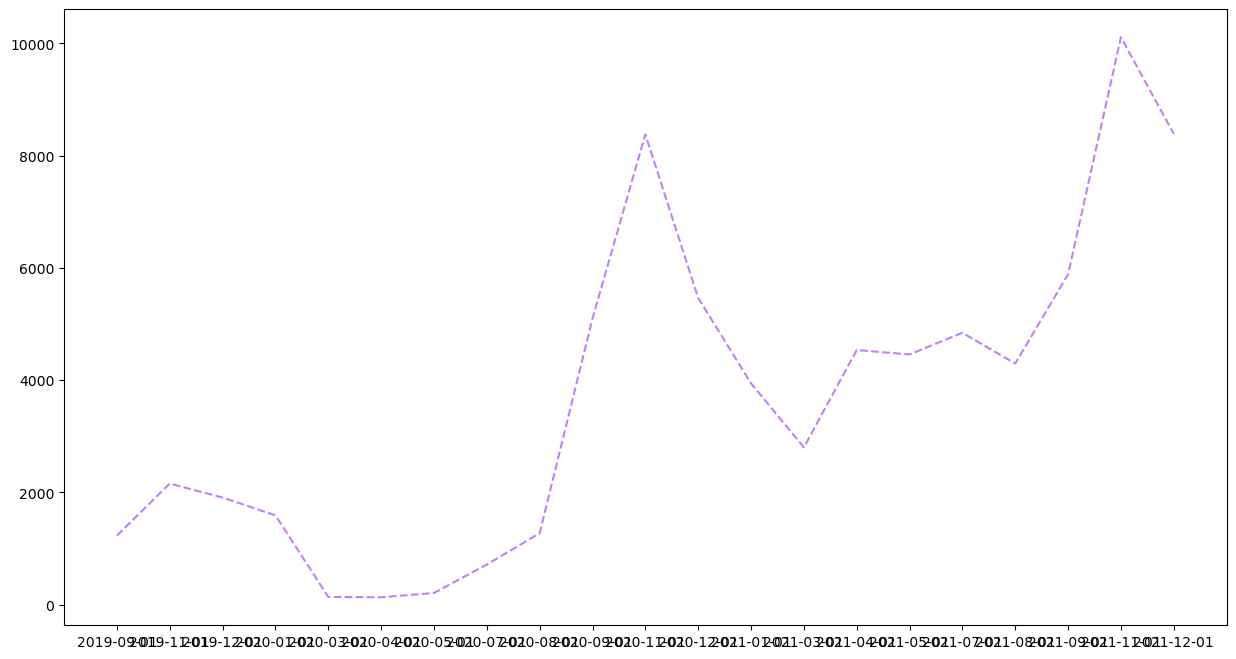

In [12]:
chile['customer'] = chile['customer'].str.strip()

# Definir la variable linestyles
linestyles = {
    'Amazon': '-',
    'Electricalsbea Stores': '--'
}

# Definir una paleta de colores para las categorías
palette = sns.color_palette("husl", n_colors=chile['category'].nunique())

# Crear un mapa de colores para cada categoría
color_map = {category: palette[i] for i, category in enumerate(chile['category'].unique())}

# Agrupar los datos por fecha, categoría y cliente


# Crear la visualización de series temporales
plt.figure(figsize=(15, 8))
for category in grouped_data['category'].unique():
    for customer in grouped_data['customer'].unique():
        subset = grouped_data[(grouped_data['category'] == category) & (grouped_data['customer'] == customer)]
        plt.plot(subset['date'], subset['total_gross_sales'], label=f'{category} ({customer})', linestyle=linestyles[customer], color=color_map[category])

plt.title('Ventas Brutas Totales a lo largo del Tiempo por Categoría y Cliente')
plt.xlabel('Fecha')
plt.ylabel('Ventas Brutas Totales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()


> To GPT4:  
 Do you know the issue I see with the charts you're providing? The dates from 2021-12-01 revert back to 2019 and disrupt the chronology. It seems the issue lies in the order of the data I provided you. Those specific months are the ones missing in the correct sequence. Can you sort the data based on the x-axis of the chart? That is, by the dates?

In [13]:
grouped_data['date'] = pd.to_datetime(grouped_data['date'])
grouped_data = grouped_data.sort_values(by='date')
categories = grouped_data['category'].unique()
grouped_data

,date,category,customer,total_gross_sales
0,2019-09-01,External Solid State Drives,Electricalsbea Stores,"1,229.07"
1,2019-09-01,Graphic Card,Electricalsbea Stores,777.60
2,2019-09-01,Internal HDD,Electricalsbea Stores,254.30
3,2019-09-01,Keyboard,Electricalsbea Stores,"2,046.25"
4,2019-09-01,MotherBoard,Electricalsbea Stores,30.74
...,...,...,...,...
444,2021-12-01,Batteries,Electricalsbea Stores,"16,105.29"
443,2021-12-01,Batteries,Amazon,"14,883.07"
469,2021-12-01,Wi fi extender,Amazon,"7,496.09"
455,2021-12-01,Keyboard,Amazon,"43,687.06"


Wow, isn't this amazing?? Look the next visualization maded by Code Interpreter:

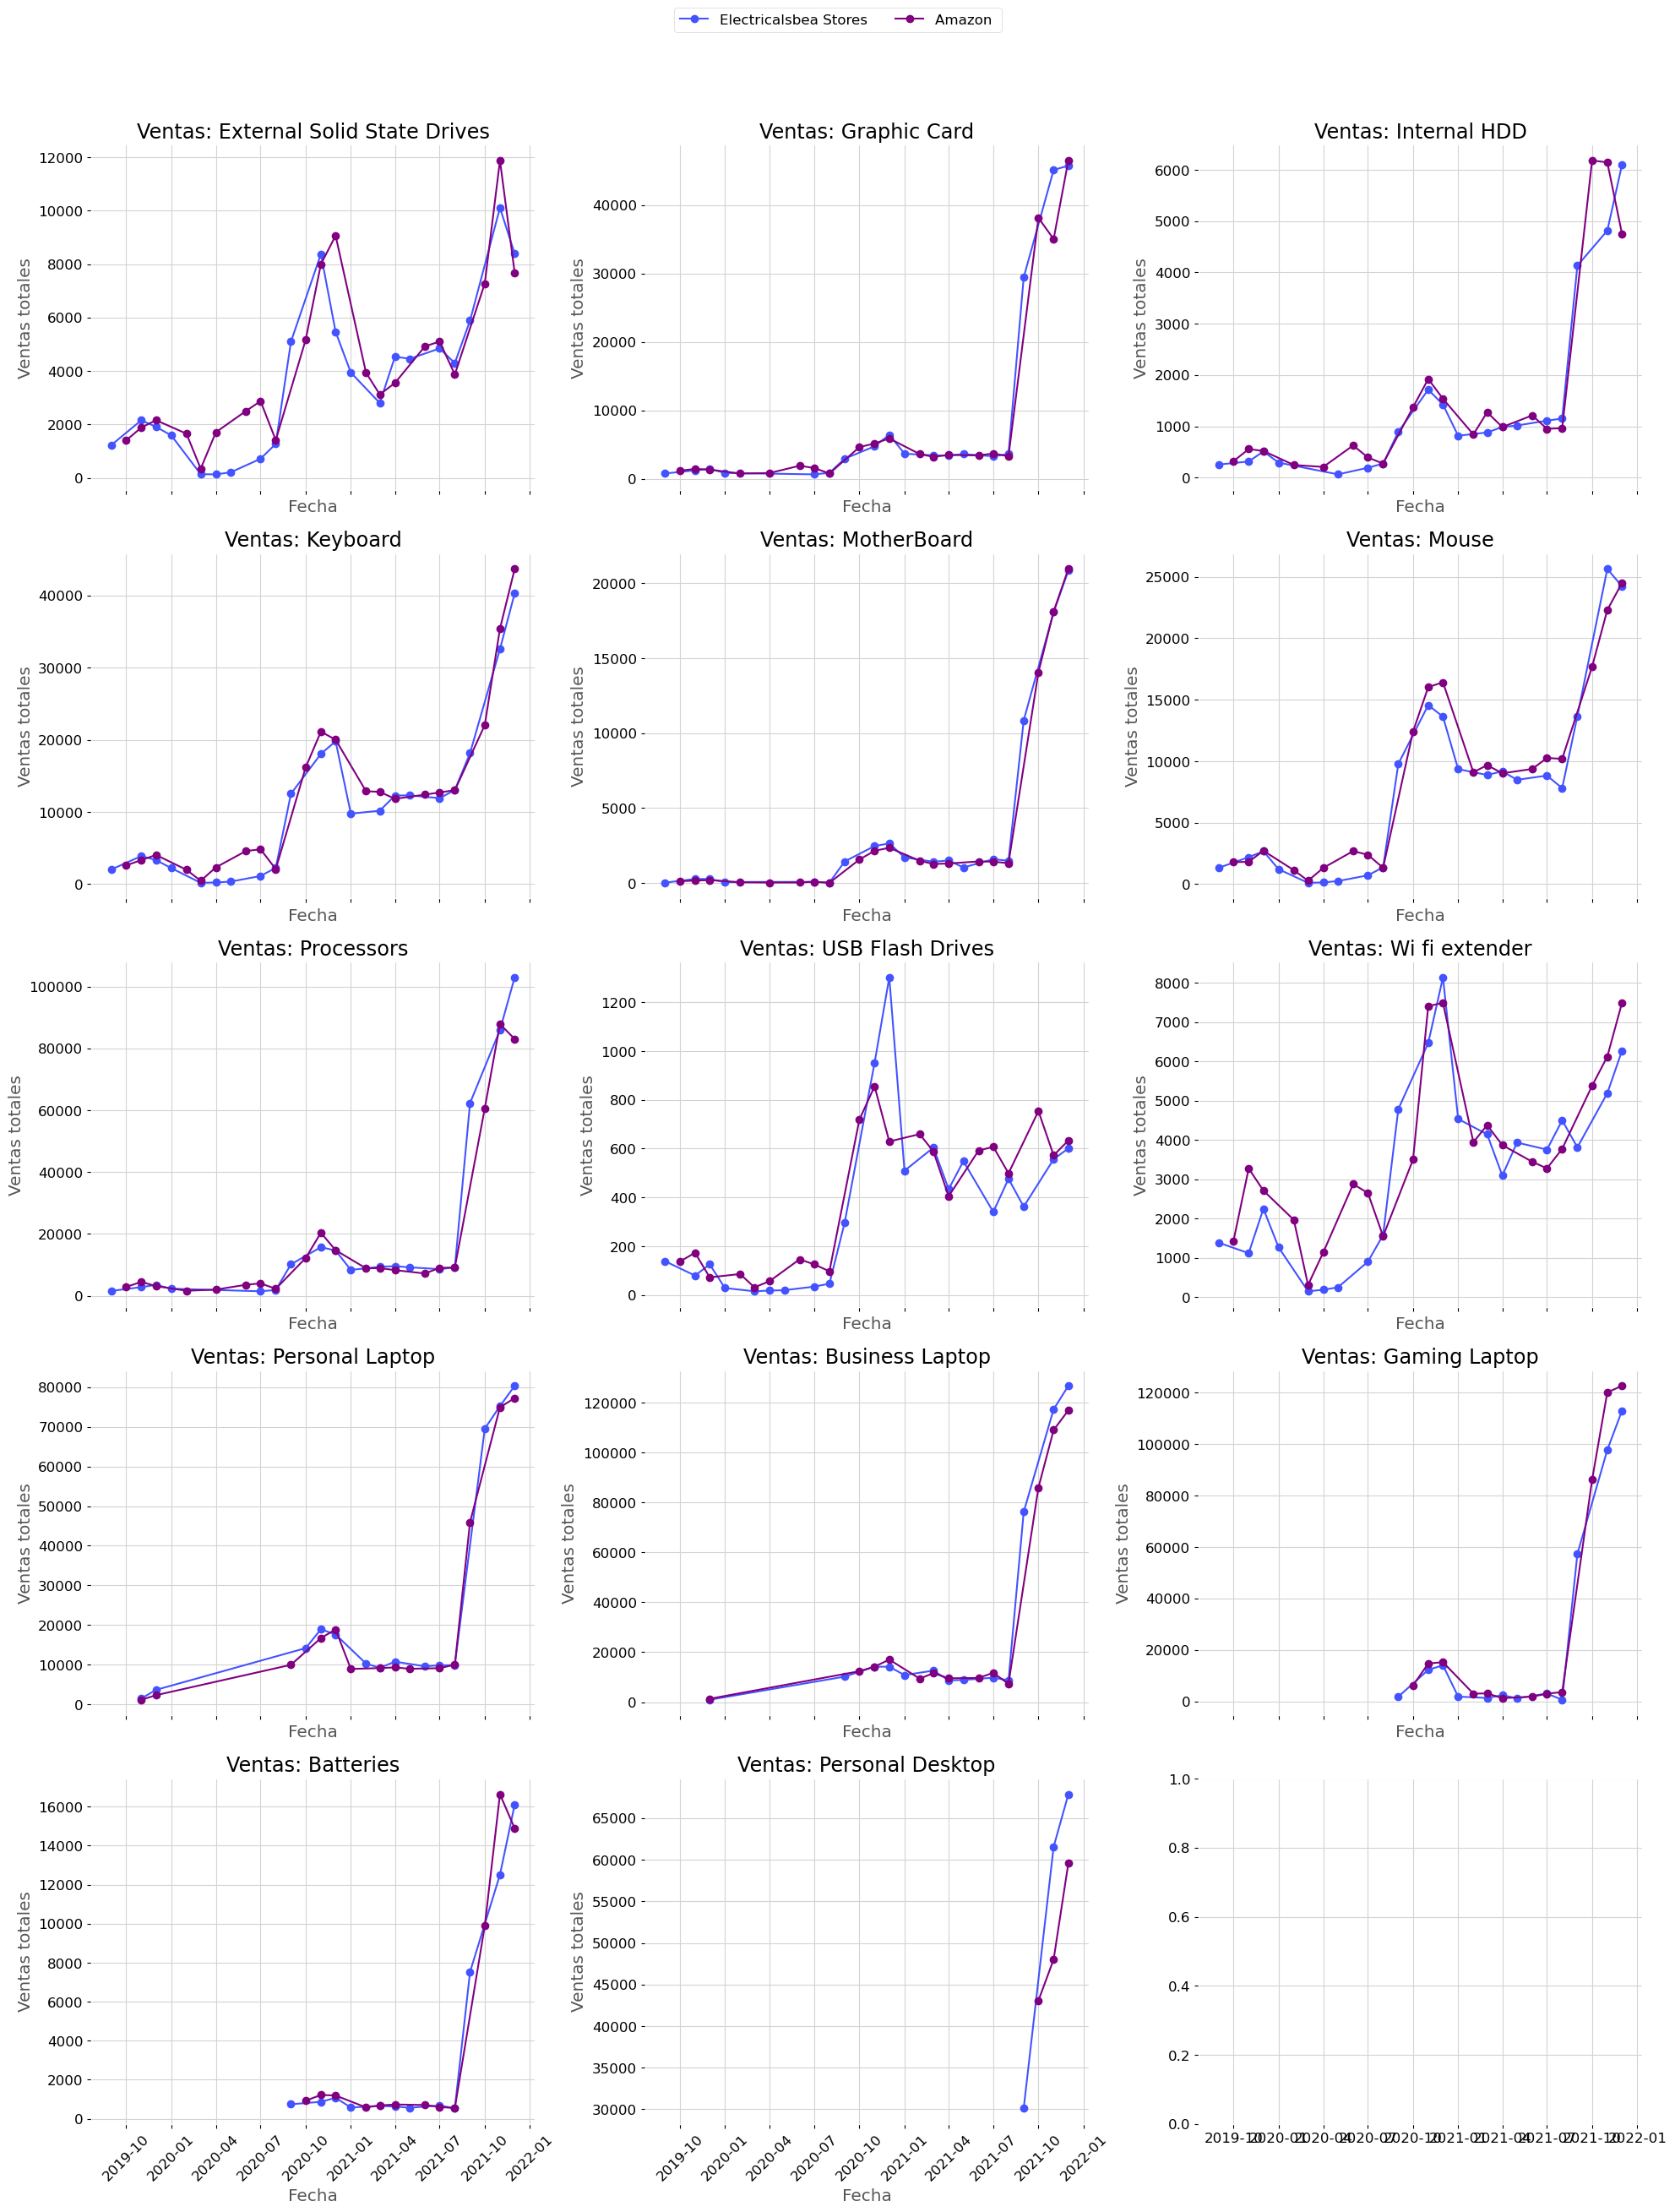

In [14]:
import sys
sys.path.append('..')
from utility import plot_settings

# Ajustamos el número de filas y columnas para la matriz de gráficos
n_cols = 3
n_rows = int(np.ceil(len(categories) / n_cols))

# Creamos la matriz de gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharex=True)

# Iteramos sobre cada categoría y la colocamos en la matriz
for idx, category in enumerate(categories):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    subset = grouped_data[grouped_data['category'] == category]
    lines = []  # Almacenamos las líneas para la leyenda
    labels = []  # Almacenamos las etiquetas para la leyenda
    for customer in subset['customer'].unique():
        customer_data = subset[subset['customer'] == customer]
        line, = ax.plot(customer_data['date'], customer_data['total_gross_sales'], label=customer, marker='o')
        lines.append(line)
        labels.append(customer)
    ax.set_title(f'Ventas: {category}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Ventas totales')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Ajustamos el layout y añadimos una leyenda global
fig.tight_layout()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))
plt.show()


Look the competition about these two customers!! We, can observe that both of them had growth exponentially! And perhaps the fact that they differ in platform is what has allowed Electricalsbea Stores to compete against Amazon!

We can see that some products, like batteries and laptops in general, have seen the steepest growth in recent months. Just look at the "Personal Desktop"! Since its release around September 2021, it has experienced consistent growth in such a short period of time.

But there's something... there's something that marked this trend because many of the categories started to grow so abruptly from July 2021 onwards! For a clearer visualization, let's put them all together on the same chart:

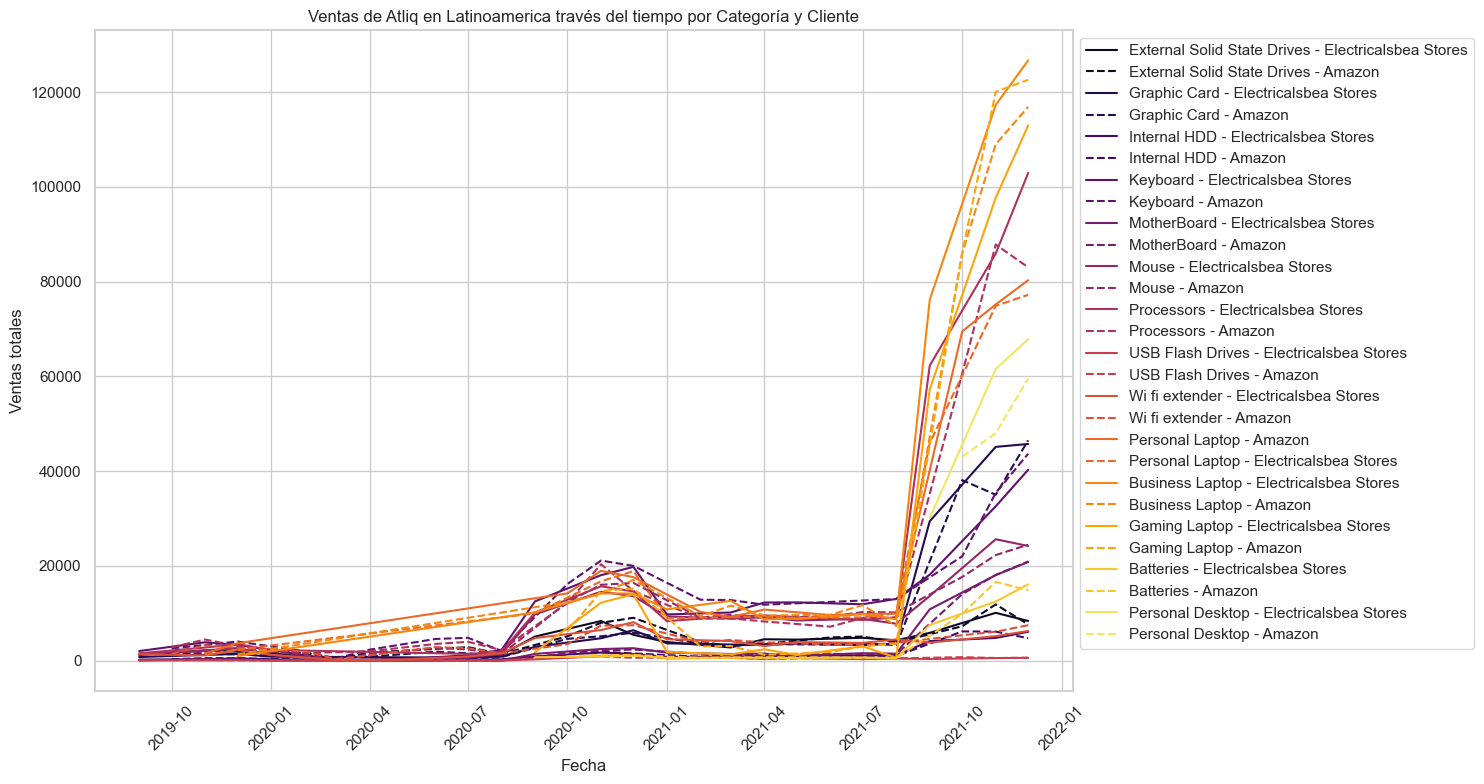

In [15]:
line_styles = ['-', '--', '-.', ':']

# Establecemos el estilo y la paleta de colores de Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("inferno", n_colors=len(categories))

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

for idx, category in enumerate(categories):
    subset = grouped_data[grouped_data['category'] == category]
    for j, customer in enumerate(subset['customer'].unique()):
        customer_data = subset[subset['customer'] == customer]
        sns.lineplot(data=customer_data, x='date', y='total_gross_sales', 
                    label=f"{category} - {customer}", 
                    color=palette[idx], 
                    linestyle=line_styles[j % len(line_styles)], 
                    ax=ax)

ax.set_title('Ventas de Atliq en Latinoamerica través del tiempo por Categoría y Cliente')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas totales')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Wow! We can see that laptops, in general, experienced the most abrupt growth! I wouldn't say it was exactly in July, but rather in August, and we can observe that both Amazon and Electricalsbea Stores grew in a similar manner. This leads me to believe that this growth was not due to the customers, the platform, or the products (as we can see some had been on the market for almost 2 years without significant growth). I believe this surge in sales might have been due to a change in AtliQ's direction in Latin America in August 2021. To pinpoint what caused this, I'll search the internet for news or similar information, and I'll create a specialized notebook to identify that pivotal moment which propelled AtliQ's growth in this manner!

In [16]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               471 non-null    datetime64[ns]
 1   category           471 non-null    object        
 2   customer           471 non-null    object        
 3   total_gross_sales  471 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 18.4+ KB


In [17]:
# Export

That's all! Thanks for sticking with me until the end! If you want to see that exact pivotal moment around August 2021 that caused AtliQ's sales to skyrocket so abruptly, I've left my project in a GitHub repository in case you want to experiment with all of this on your local machine. n.n

I'm thinking that ChatGPT-4's training data goes up until September 2021, and this pivotal point occurred in August, so maybe it has gathered some information on this... 🫣